# Data Mining on Titanic dataset

## in this project we will be applying assosiation rules and do multiple data vizualisation using  seaborn and matplotlib


<div class="alert alert-block alert-success">
<b>what we will see along this project:</b> 
    <ul>
        <li><b>How to import a rdata file</b></li>
        <li><b>Reading a radom sampling from the dataset</b></li>
        <li><b>Viewing frequency in dataset item</b></li>
        <li><b>Aggregating data and count plot</b></li>
        <li><b>Casting dataframe to list and transaction enconding</b></li>
        <li><b>Interpretation of association rules results</b></li>
    </ul>
</div>

In [13]:
import pyreadr

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori ,association_rules
from apyori import apriori as ap


## <li>importing dataset</li>

In [14]:
rdata= pyreadr.read_r('C:/Datasets/R_datasets/titanic.raw.rdata')




## <li>Dataset exploring and sampling</li>

In [15]:
td=rdata['titanic.raw']
td.info()
h=pd.DataFrame(td)
td.head(100)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2201 entries, 0 to 2200
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   Class     2201 non-null   category
 1   Sex       2201 non-null   category
 2   Age       2201 non-null   category
 3   Survived  2201 non-null   category
dtypes: category(4)
memory usage: 9.3 KB


,Class,Sex,Age,Survived
0,3rd,Male,Child,No
1,3rd,Male,Child,No
2,3rd,Male,Child,No
3,3rd,Male,Child,No
4,3rd,Male,Child,No
...,...,...,...,...
95,1st,Male,Adult,No
96,1st,Male,Adult,No
97,1st,Male,Adult,No
98,1st,Male,Adult,No


In [16]:
td.sample(10)

,Class,Sex,Age,Survived
387,3rd,Male,Adult,No
1609,2nd,Male,Adult,Yes
1144,Crew,Male,Adult,No
601,3rd,Male,Adult,No
1412,3rd,Female,Adult,No
1462,3rd,Female,Adult,No
321,2nd,Male,Adult,No
2091,2nd,Female,Adult,Yes
2061,2nd,Female,Adult,Yes
1723,Crew,Male,Adult,Yes


In [17]:
td.describe()

,Class,Sex,Age,Survived
count,2201,2201,2201,2201
unique,4,2,2,2
top,Crew,Male,Adult,No
freq,885,1731,2092,1490


## <li>Dataset transaction frequency visualization</li>

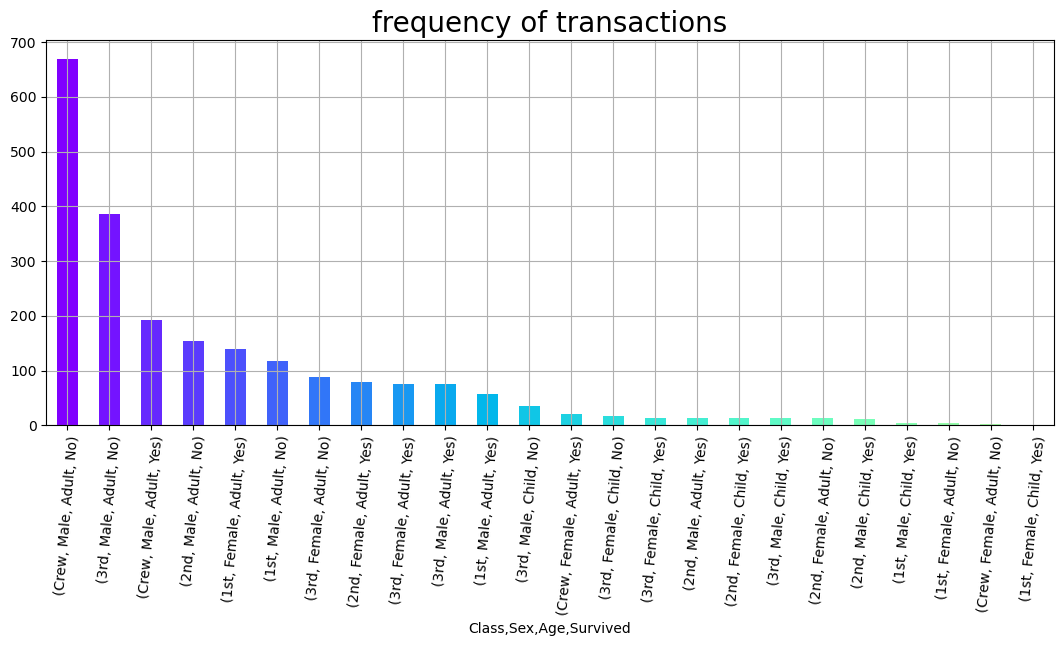

In [18]:


colors = plt.cm.rainbow(np.linspace(0, 1, 40))

td.value_counts().plot.bar(color = colors, figsize=(13,5))

plt.title('frequency of transactions', fontsize = 20)
plt.xticks(rotation = 85)
plt.grid()
plt.show()



In [19]:
td.value_counts()

Class  Sex     Age    Survived
Crew   Male    Adult  No          670
3rd    Male    Adult  No          387
Crew   Male    Adult  Yes         192
2nd    Male    Adult  No          154
1st    Female  Adult  Yes         140
       Male    Adult  No          118
3rd    Female  Adult  No           89
2nd    Female  Adult  Yes          80
3rd    Female  Adult  Yes          76
       Male    Adult  Yes          75
1st    Male    Adult  Yes          57
3rd    Male    Child  No           35
Crew   Female  Adult  Yes          20
3rd    Female  Child  No           17
                      Yes          14
2nd    Male    Adult  Yes          14
       Female  Child  Yes          13
3rd    Male    Child  Yes          13
2nd    Female  Adult  No           13
       Male    Child  Yes          11
1st    Male    Child  Yes           5
       Female  Adult  No            4
Crew   Female  Adult  No            3
1st    Female  Child  Yes           1
dtype: int64

### <li> Grouping the dataset</li>

In [20]:
td['Survived'].value_counts()  
td.groupby(['Class','Sex','Age','Survived']).value_counts()

Class  Sex     Age    Survived
1st    Female  Adult  No            4
                      Yes         140
               Child  No            0
                      Yes           1
       Male    Adult  No          118
                      Yes          57
               Child  No            0
                      Yes           5
2nd    Female  Adult  No           13
                      Yes          80
               Child  No            0
                      Yes          13
       Male    Adult  No          154
                      Yes          14
               Child  No            0
                      Yes          11
3rd    Female  Adult  No           89
                      Yes          76
               Child  No           17
                      Yes          14
       Male    Adult  No          387
                      Yes          75
               Child  No           35
                      Yes          13
Crew   Female  Adult  No            3
                   

## <li>Survival rates view</li>

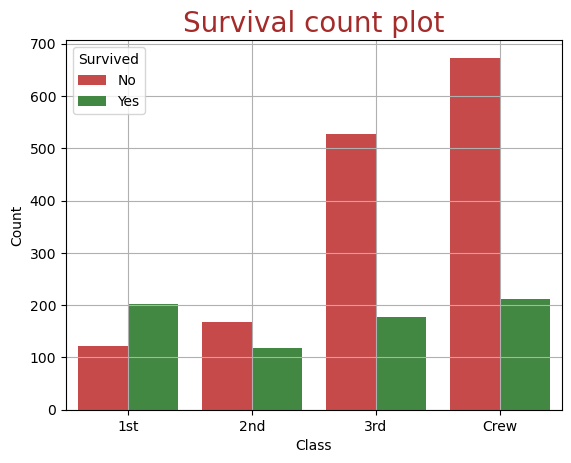

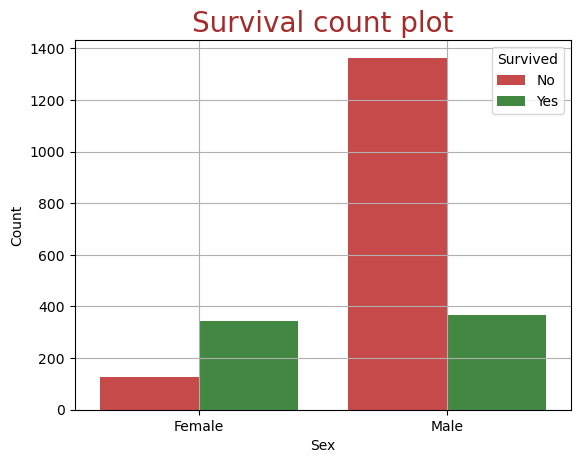

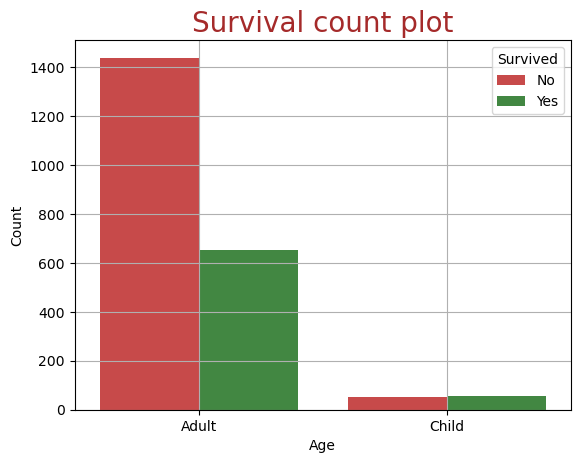

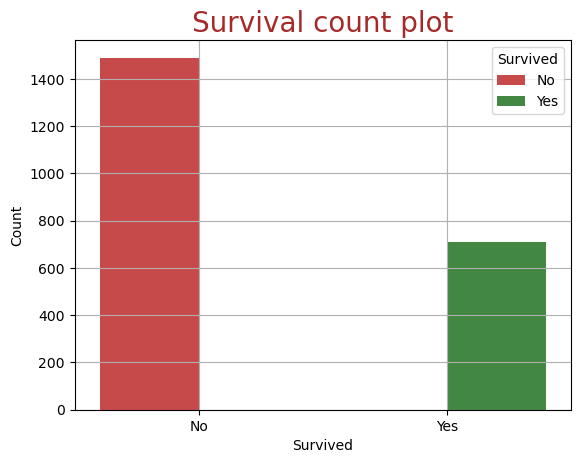

In [80]:
for itr in ["Class","Sex","Age","Survived"]:
    
    ax = sns.countplot(x=itr, hue="Survived",palette=["#DC3535","#379237"],data=td)
    
    
    plt.ylabel("Count")
    plt.xlabel(itr)
    plt.grid()
    plt.title(label="Survival count plot",
          fontsize=20,
          color="brown")
    plt.show()

## <li>Pre-processing dataset</li>
<li>we will be working with TransactionEncoder() to encode our data</li> 
<li>TransactionEncoder() works with lists not dataframe so a <b>casting from Dataframe to lists is must</b></li>

### <li>preprocessing exemples:</li>
<li>exemple in: <a href="url">https://rasbt.github.io/mlxtend/user_guide/frequent_patterns/apriori/</a></li>
<li>exemple in: <a href="url">https://stackabuse.com/association-rule-mining-via-apriori-algorithm-in-python/</a></li>


In [22]:

%%time
# %%time : for showing execution time

dataset = td.values.tolist()
'''
or you can use this code to replace the above implementation:

dataset = []
for i in range(1, td.shape[0]):
    dataset.append([str(td.values[i,j]) for j in range(0, td.shape[1])])
    
#td.shape[0]                             -> returns the number of rows
#td.shape[1]                             -> returns the number of columns
#dataset.append                          ->(adds transaction of type  list to the dataset list)
#str()                                   -> casting to string
#td.values[i,j] for j in range(0, td.shape[1])               -> extracting values from dataframe from first to last column

#warning execution time for thins code is not optimal

'''

oht = TransactionEncoder()
oht_ary = oht.fit(dataset).transform(dataset)

oht_ary
df = pd.DataFrame(oht_ary, columns=oht.columns_)
df.head()
 


CPU times: total: 15.6 ms
Wall time: 5 ms


,1st,2nd,3rd,Adult,Child,Crew,Female,Male,No,Yes
0,False,False,True,False,True,False,False,True,True,False
1,False,False,True,False,True,False,False,True,True,False
2,False,False,True,False,True,False,False,True,True,False
3,False,False,True,False,True,False,False,True,True,False
4,False,False,True,False,True,False,False,True,True,False


In [23]:
frequent_itemsets = apriori(df, min_support=0.005, use_colnames=True)
frequent_itemsets['length'] = frequent_itemsets['itemsets'].apply(lambda x: len(x))
frequent_itemsets.sort_values(by='support',ascending=False)

,support,itemsets,length
3,0.950477,(Adult),1
7,0.786461,(Male),1
29,0.757383,"(Adult, Male)",2
8,0.676965,(No),1
30,0.653339,"(Adult, No)",2
...,...,...,...
95,0.005906,"(Child, Yes, 2nd, Female)",4
55,0.005906,"(Child, 2nd, Female)",3
57,0.005906,"(Female, 2nd, No)",3
103,0.005906,"(Male, Yes, Child, 3rd)",4


In [82]:
#association_rules(frequent_itemsets,metric="confidence", min_threshold=0.7)
a=association_rules(frequent_itemsets,metric="confidence", min_threshold=0.7)

a["antecedent_len"] = a["antecedents"].apply(lambda x: len(x))
a["survived"] = a["consequents"].apply(lambda x: str(x).strip("frozenset({\'})"))
a["anteced"] = a["antecedents"].apply(lambda x: str(x).strip("frozenset({})"))

b=a[((a["consequents"]=={'No'}) |(a["consequents"]=={'Yes'})) &(a.antecedent_len>2) ]
b.sort_values(by='confidence',ascending=False)




,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,antecedent_len,survived,anteced
83,"(Female, 2nd, Child)",(Yes),0.005906,0.323035,0.005906,1.000000,3.095640,0.003998,inf,3,Y,"'Female', '2nd', 'Child'"
66,"(Adult, 1st, Female)",(Yes),0.065425,0.323035,0.063607,0.972222,3.009650,0.042473,24.370741,3,Y,"'Adult', '1st', 'Female'"
78,"(Adult, Male, 2nd)",(No),0.076329,0.676965,0.069968,0.916667,1.354083,0.018296,3.876420,3,N,"'Adult', 'Male', '2nd'"
97,"(Crew, Adult, Female)",(Yes),0.010450,0.323035,0.009087,0.869565,2.691861,0.005711,5.190065,3,Y,"'Crew', 'Adult', 'Female'"
75,"(Adult, 2nd, Female)",(Yes),0.042254,0.323035,0.036347,0.860215,2.662916,0.022698,4.842904,3,Y,"'Adult', '2nd', 'Female'"
88,"(Adult, Male, 3rd)",(No),0.209905,0.676965,0.175829,0.837662,1.237379,0.033731,1.989896,3,N,"'Adult', 'Male', '3rd'"
100,"(Crew, Adult, Male)",(No),0.391640,0.676965,0.304407,0.777262,1.148157,0.039280,1.450292,3,N,"'Crew', 'Adult', 'Male'"
96,"(Male, Child, 3rd)",(No),0.021808,0.676965,0.015902,0.729167,1.077111,0.001138,1.192745,3,N,"'Male', 'Child', '3rd'"


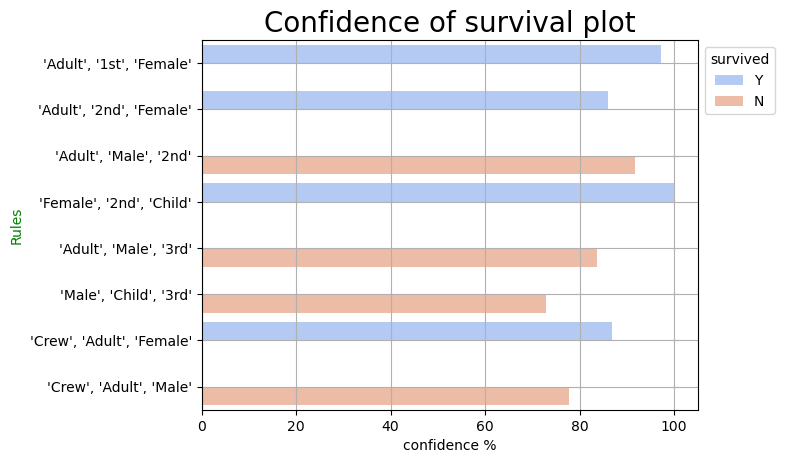

In [84]:


ax = sns.barplot(x=b["confidence"]*100,y="anteced",hue=b.survived,data=b,palette="coolwarm")
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
plt.ylabel("Rules",color="green")
plt.xlabel("confidence %")
plt.grid()

plt.title(label="Confidence of survival plot",fontsize=20,color="black")
plt.show()